In [1]:
#Imports
from random import randrange, uniform
import matplotlib.pyplot as plt
import numpy as np

# Definicion de una neurona

In [2]:
#Valores
L=30
C_base=1
P=0.7

#Clase de neurona
class Neurona:
    estado=None
    valor=None
    valor_old=None
    estados=None
    valores=None
    P_f=None
    g=None
    valor_vecinos=None
    muerta=None
    
    #Constructor
    def __init__(self, P_f, g):
        self.estado=0
        self.valor=0
        self.valor_old=0
        self.estados=[]
        self.valores=[]
        self.P_f=P_f
        self.g=g
        self.valor_vecinos=0
        self.muerta=0
        
    def set_p_f(self, p_f):
        self.P_f=p_f
        
    def set_v_aleat(self):
        self.valor=uniform(0,29)
        
    def set_muerta(self):
        self.muerta=1

    #Funcion de disparo
    def disparar(self):
        if self.muerta==1:
            self.valores.append(-20)
            self.estados.append(0)
            self.estado=0
            self.valor=0
            return
            
        self.valores.append(self.valor)
        self.estados.append(self.estado)
        
        self.valor_old=self.valor
        if self.estado==0:
            if self.valor<L:
                if uniform(0,1) < P:
                    self.valor = self.valor + C_base
            else:
                if uniform(0,1) < self.P_f:
                    self.valor = self.valor + 3*L
                    self.estado=1
                else:
                    self.valor = self.valor - L/5
                    self.estado=2
        elif self.estado==1:
            if self.valor<=L:
                self.valor=0
                self.estado=0
            else:
                self.valor = self.valor - L

        else:
            if self.valor<=L/5:
                self.valor=0
                self.estado=0
            else:
                self.valor = self.valor - L/5

# Neurona aislada

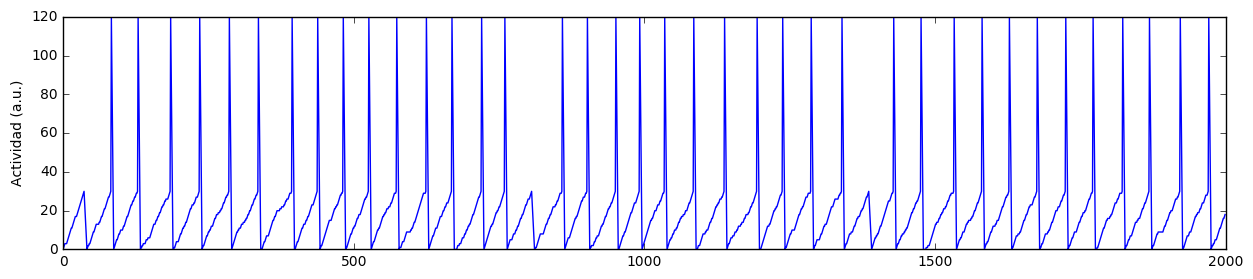

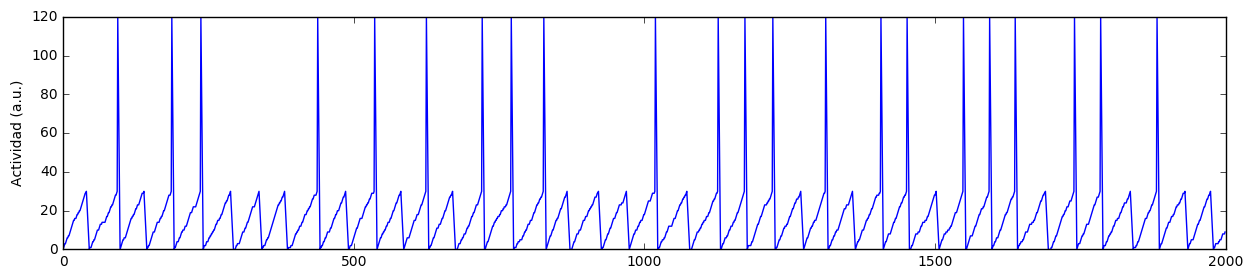

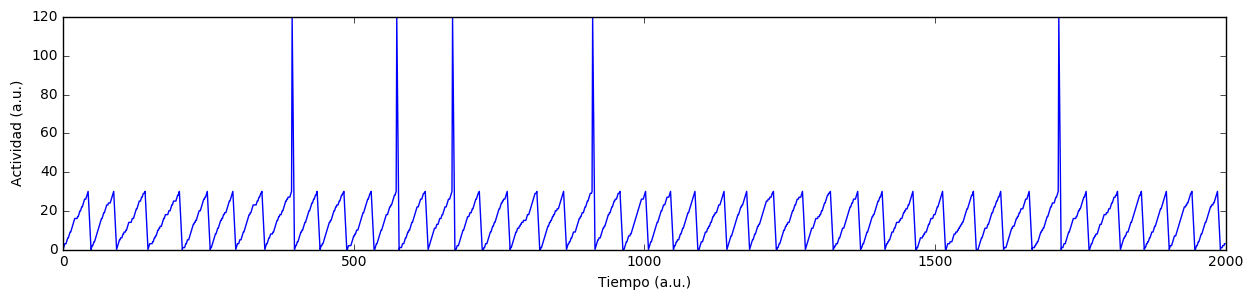

In [3]:
#Tres neuronas
neu1 = Neurona(0.9, 0)
neu2 = Neurona(0.5, 0)
neu3 = Neurona(0.1, 0)

#Disparan
for i in range(2000):
    neu1.disparar()
    neu2.disparar()
    neu3.disparar()

#Pinto resultado
plt.figure(figsize=(15,3))    
plt.plot(neu1.valores)
plt.ylabel("Actividad (a.u.)")
plt.show()

plt.figure(figsize=(15,3))    
plt.plot(neu2.valores)
plt.ylabel("Actividad (a.u.)")
#plt.xlim([500,600])
plt.show()

plt.figure(figsize=(15,3))    
plt.plot(neu3.valores)
plt.ylabel("Actividad (a.u.)")
plt.xlabel("Tiempo (a.u.)")
plt.show()

# Red de neuronas

In [4]:
def disparo_red(matrix):
    N=len(matrix)
    #Disparo propio
    for i in range(N):
        for j in range(N):
            matrix[i][j].disparar()
    #Contribucion de los vecinos
    for i in range(N):
        for j in range(N):
            matrix[i][j].valor_vecinos = 0
            if i-1>=0:
                matrix[i][j].valor_vecinos=matrix[i][j].valor_vecinos+(matrix[i-1][j].valor_old-matrix[i][j].valor_old)
            if i+1<N:
                matrix[i][j].valor_vecinos=matrix[i][j].valor_vecinos+(matrix[i+1][j].valor_old-matrix[i][j].valor_old)
            if j-1>=0:
                matrix[i][j].valor_vecinos=matrix[i][j].valor_vecinos+(matrix[i][j-1].valor_old-matrix[i][j].valor_old)
            if j+1<N:
                matrix[i][j].valor_vecinos=matrix[i][j].valor_vecinos+(matrix[i][j+1].valor_old-matrix[i][j].valor_old)
            matrix[i][j].valor_vecinos = matrix[i][j].g * matrix[i][j].valor_vecinos
    #Sumamos propio y vecino
    for i in range(N):
        for j in range(N):
            matrix[i][j].valor = matrix[i][j].valor + matrix[i][j].valor_vecinos
    return matrix

# Red sin estimulos

g=0.001


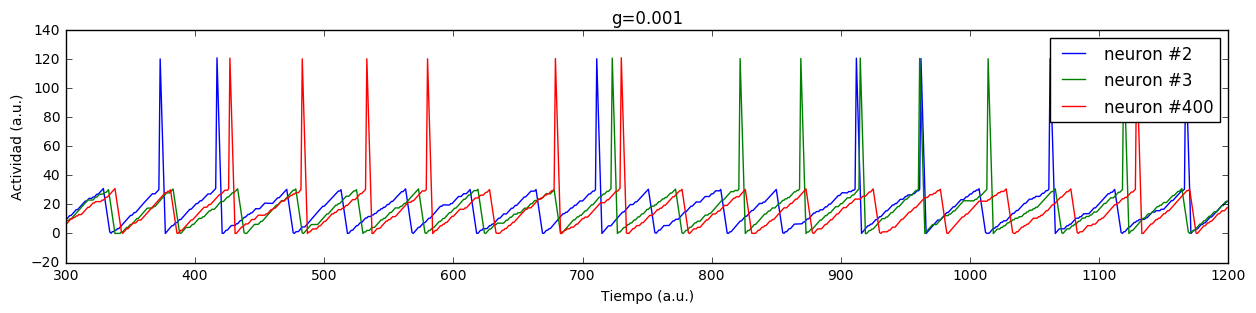

g=0.06


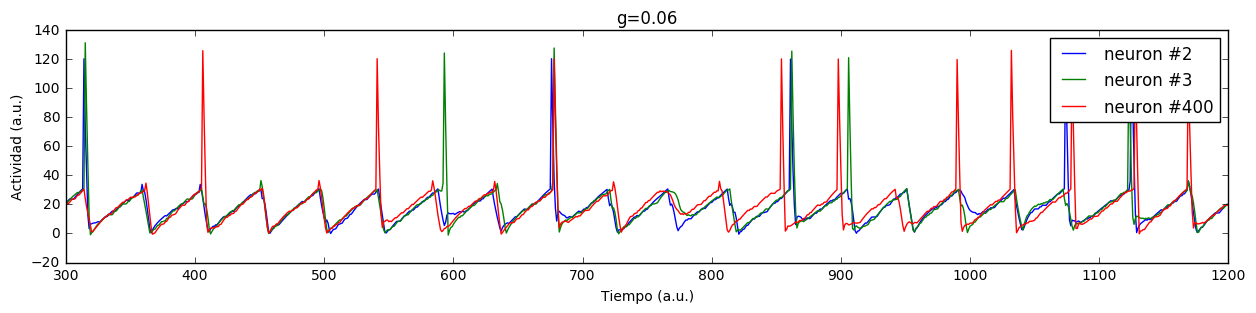

g=0.17


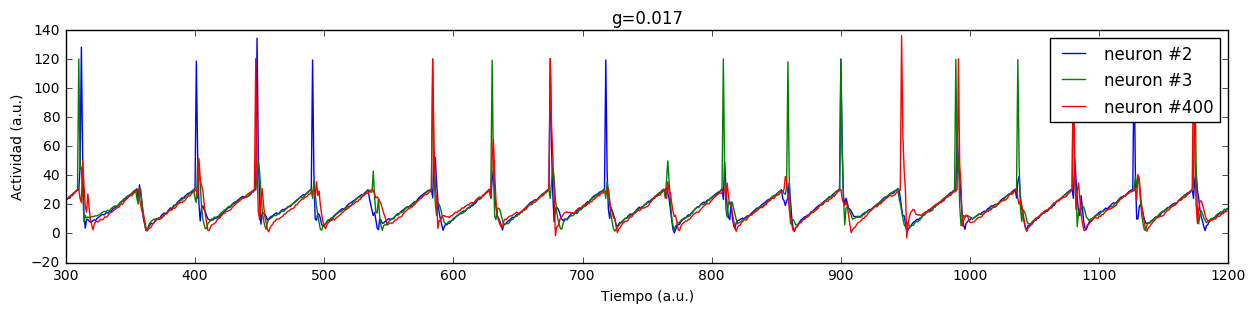

In [5]:
N=50

matrix1 = [[Neurona(0.4, 0.001) for j in range(N)] for i in range(N)]
matrix2 = [[Neurona(0.4, 0.06) for j in range(N)] for i in range(N)]
matrix3 = [[Neurona(0.4, 0.17) for j in range(N)] for i in range(N)]
for i in range (1200):
    disparo_red(matrix1)
    disparo_red(matrix2)
    disparo_red(matrix3)

print("g=0.001")
plt.figure(figsize=(15,3))
plt.plot(matrix1[0][2].valores, label='neuron #2')
plt.plot(matrix1[0][3].valores, label='neuron #3')
plt.plot(matrix1[8][0].valores, label='neuron #400')
plt.legend(loc='upper right', shadow=False)
plt.xlim([300,1200])
plt.title("g=0.001")
plt.ylabel("Actividad (a.u.)")
plt.xlabel("Tiempo (a.u.)")
plt.show()

print("g=0.06")
plt.figure(figsize=(15,3))    
plt.plot(matrix2[0][2].valores, label='neuron #2')
plt.plot(matrix2[0][3].valores, label='neuron #3')
plt.plot(matrix2[8][0].valores, label='neuron #400')
plt.legend(loc='upper right', shadow=False)
plt.xlim([300,1200])
plt.title("g=0.06")
plt.ylabel("Actividad (a.u.)")
plt.xlabel("Tiempo (a.u.)")
plt.show()

print("g=0.17")
plt.figure(figsize=(15,3))    
plt.plot(matrix3[0][2].valores, label='neuron #2')
plt.plot(matrix3[0][3].valores, label='neuron #3')
plt.plot(matrix3[8][0].valores, label='neuron #400')
plt.legend(loc='upper right', shadow=False)
plt.xlim([300,1200])
plt.title("g=0.017")
plt.ylabel("Actividad (a.u.)")
plt.xlabel("Tiempo (a.u.)")
plt.show()

In [54]:
print("g baja")

time=500
newarray = [[0.0 for j in range(N)] for i in range(N)]
lista=[]
fig=plt.figure(figsize=(8,8))
count=0
for time in range(500, 600, 1):
    for i in range(N):
        for j in range(N):
            newarray[i][j]=matrix1[i][j].valores[time]
    lista.append(plt.pcolor(newarray, vmin=0, vmax=30))
    #plt.colorbar()
    count=count+1
    plt.savefig('g_baja/image'+str(count)+'.png')
plt.clf()

g baja


In [55]:
print("g media")

time=500
newarray = [[0.0 for j in range(N)] for i in range(N)]
lista=[]
fig=plt.figure(figsize=(8,8))
count=0
for time in range(500, 600, 1):
    for i in range(N):
        for j in range(N):
            newarray[i][j]=matrix2[i][j].valores[time]
    lista.append(plt.pcolor(newarray, vmin=0, vmax=30))
    #plt.colorbar()
    count=count+1
    plt.savefig('g_media/image'+str(count)+'.png')
plt.clf()

g media


In [63]:
print("g alta")

time=500
newarray = [[0.0 for j in range(N)] for i in range(N)]
lista=[]
fig=plt.figure(figsize=(8,8))
count=0
for time in range(380, 420, 1):
    for i in range(N):
        for j in range(N):
            newarray[i][j]=matrix3[i][j].valores[time]
    lista.append(plt.pcolor(newarray, vmin=0, vmax=30))
    #plt.colorbar()
    count=count+1
    plt.savefig('g_alta/image'+str(count)+'.png')
plt.clf()

g alta


# Redes con estímulos

### Prueba
He comprobado que se cambie correctamente p_f de los cluster selecionados

In [71]:
N=50
matrix0 = [[Neurona(0.0, 0.06) for j in range(N)] for i in range(N)]
for i in range(N):
    for j in range(N):
        if i>=10 and i<=15:
            if j>=9 and j<=14:
                matrix0[i][j].set_p_f(0.99)
        elif i>=34 and i<=39:
            if j>=33 and j<=38:
                matrix0[i][j].set_p_f(0.99)
for i in range (100):
    disparo_red(matrix0)

plt.figure(figsize=(8,8))  
newarray = [[0.0 for j in range(N)] for i in range(N)]
count=0
for time in range(0, 100, 1):
    for i in range(N):
        for j in range(N):
            newarray[i][j]=matrix0[i][j].valores[time]
    plt.pcolor(newarray, vmin=0, vmax=80)
    #plt.colorbar()
    count=count+1
    plt.savefig('0/image'+str(count)+'.png')
plt.clf()

## Dos emergentes al mismo tiempo

Cluster1 p_f=0.8
Cluster2 p_f=0.8


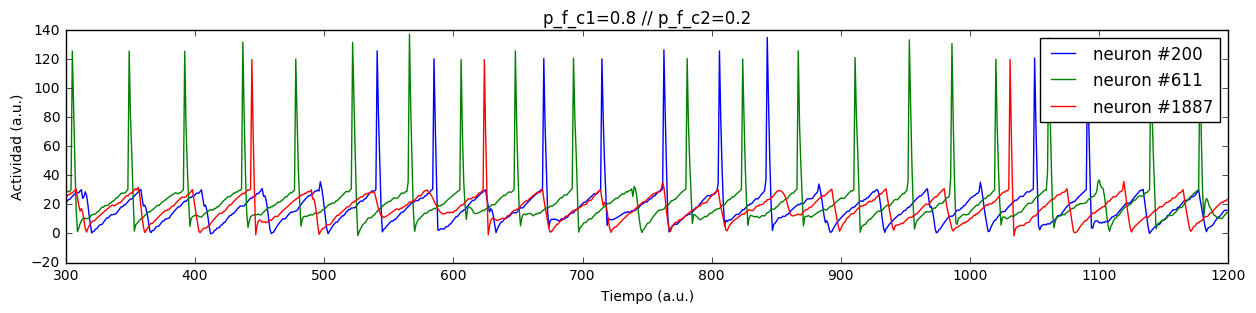

In [41]:
N=50
matrix1 = [[Neurona(0.4, 0.06) for j in range(N)] for i in range(N)]
for i in range(N):
    for j in range(N):
        if i>=10 and i<=15:
            if j>=9 and j<=14:
                matrix1[i][j].set_p_f(0.8)
        elif i>=34 and i<=39:
            if j>=33 and j<=38:
                matrix1[i][j].set_p_f(0.2)

for i in range (1200):
    disparo_red(matrix1)

print("Cluster1 p_f=0.8\nCluster2 p_f=0.8")
plt.figure(figsize=(15,3))    
plt.plot(matrix1[4][0].valores, label='neuron #200')
plt.plot(matrix1[13][11].valores, label='neuron #611')
plt.plot(matrix1[36][36].valores, label='neuron #1887')
plt.legend(loc='upper right', shadow=False)
plt.xlim([300,1200])
plt.title("p_f_c1=0.8 // p_f_c2=0.2")
plt.ylabel("Actividad (a.u.)")
plt.xlabel("Tiempo (a.u.)")
plt.show()

Cluster1 p_f=0.8
Cluster2 p_f=0.8


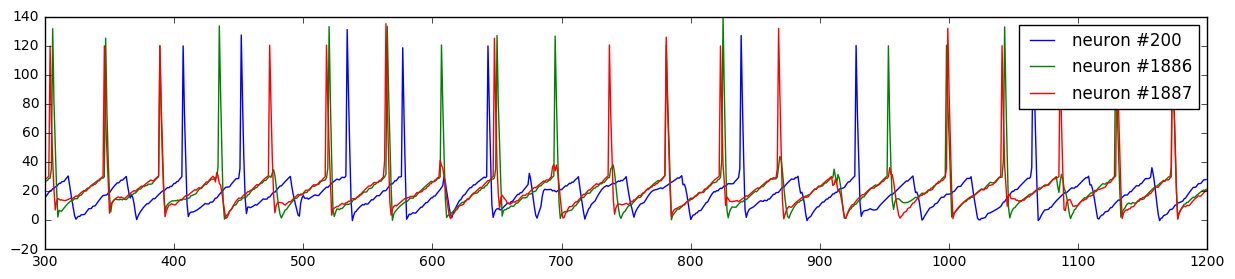

In [65]:
N=50
matrix1 = [[Neurona(0.4, 0.06) for j in range(N)] for i in range(N)]
for i in range(N):
    for j in range(N):
        if i>=10 and i<=15:
            if j>=9 and j<=14:
                matrix1[i][j].set_p_f(0.8)
        elif i>=34 and i<=39:
            if j>=33 and j<=38:
                matrix1[i][j].set_p_f(0.8)

for i in range (1200):
    disparo_red(matrix1)

print("Cluster1 p_f=0.8\nCluster2 p_f=0.8")
plt.figure(figsize=(15,3))    
plt.plot(matrix1[4][0].valores, label='neuron #200')
plt.plot(matrix1[36][35].valores, label='neuron #1886')
plt.plot(matrix1[36][36].valores, label='neuron #1887')
plt.legend(loc='upper right', shadow=False)
plt.xlim([300,1200])
plt.title("g=0.017")
plt.ylabel("Actividad (a.u.)")
plt.xlabel("Tiempo (a.u.)")
plt.show()

time=500
newarray = [[0.0 for j in range(N)] for i in range(N)]
lista=[]
fig=plt.figure(figsize=(8,8))
count=0
for time in range(500, 700, 1):
    for i in range(N):
        for j in range(N):
            newarray[i][j]=matrix1[i][j].valores[time]
    lista.append(plt.pcolor(newarray, vmin=0, vmax=30))
    #plt.colorbar()
    count=count+1
    plt.savefig('1/image'+str(count)+'.png')
plt.clf()

# Sumidero

Cluster1 p_f=0.8
Cluster2 p_f=0.2


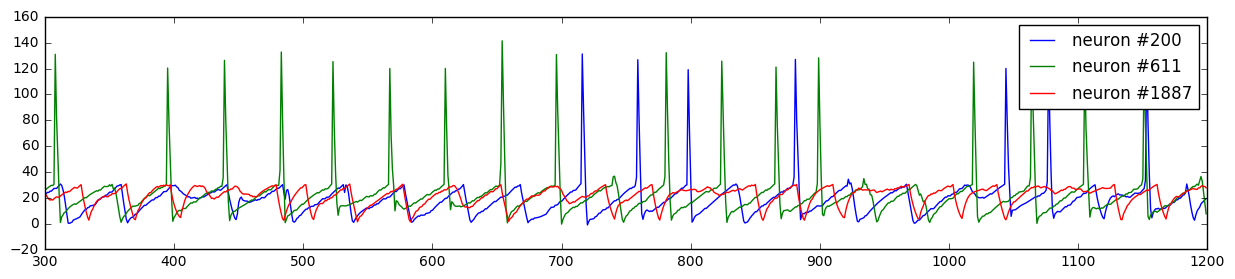

In [8]:
N=50
matrix1 = [[Neurona(0.4, 0.06) for j in range(N)] for i in range(N)]
for i in range(N):
    for j in range(N):
        if i>=10 and i<=15:
            if j>=9 and j<=14:
                matrix1[i][j].set_p_f(0.8)
        elif i>=34 and i<=39:
            if j>=33 and j<=38:
                matrix1[i][j].set_p_f(0.00)
        else:
            matrix1[i][j].set_p_f(0.4)
        

for i in range (1200):
    disparo_red(matrix1)

print("Cluster1 p_f=0.8\nCluster2 p_f=0.2")
plt.figure(figsize=(15,3))    
plt.plot(matrix1[4][0].valores, label='neuron #200')
plt.plot(matrix1[13][11].valores, label='neuron #611')
plt.plot(matrix1[36][36].valores, label='neuron #1887')
plt.legend(loc='upper right', shadow=False)
plt.xlim([300,1200])
plt.show()

time=500
newarray = [[0.0 for j in range(N)] for i in range(N)]
lista=[]
fig=plt.figure(figsize=(8,8))
count=0
for time in range(500, 600, 1):
    for i in range(N):
        for j in range(N):
            newarray[i][j]=matrix1[i][j].valores[time]
    lista.append(plt.pcolor(newarray, vmin=0, vmax=60))
    #plt.colorbar()
    count=count+1
    plt.savefig('2/image'+str(count)+'.png')
plt.clf()

## Emergentes desacompasados

Cluster1 p_f=0.9
Cluster2 p_f=0.7


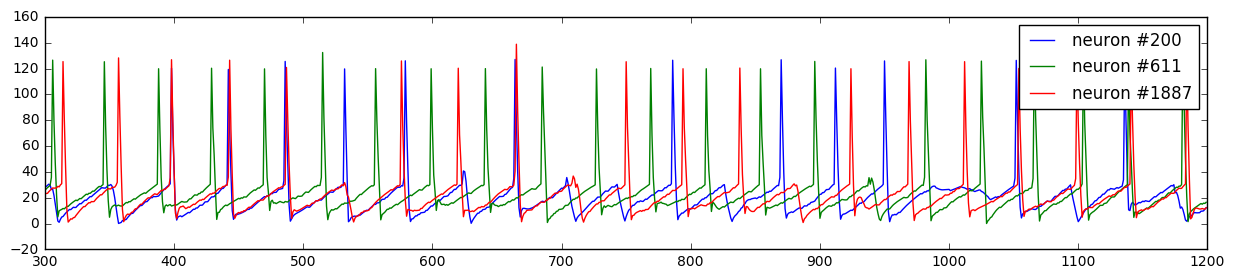

In [69]:
N=50
matrix1 = [[Neurona(0.4, 0.06) for j in range(N)] for i in range(N)]
for i in range(N):
    for j in range(N):
        if i>=10 and i<=15:
            if j>=9 and j<=14:
                matrix1[i][j].set_p_f(0.9)
        elif i>=34 and i<=39:
            if j>=33 and j<=38:
                matrix1[i][j].set_p_f(0.7)

for i in range (1200):
    disparo_red(matrix1)

print("Cluster1 p_f=0.9\nCluster2 p_f=0.7")
plt.figure(figsize=(15,3))    
plt.plot(matrix1[4][0].valores, label='neuron #200')
plt.plot(matrix1[13][11].valores, label='neuron #611')
plt.plot(matrix1[36][36].valores, label='neuron #1887')
plt.legend(loc='upper right', shadow=False)
plt.xlim([300,1200])
plt.show()

time=500
newarray = [[0.0 for j in range(N)] for i in range(N)]
lista=[]
fig=plt.figure(figsize=(8,8))
count=0
for time in range(500, 700, 1):
    for i in range(N):
        for j in range(N):
            newarray[i][j]=matrix1[i][j].valores[time]
    lista.append(plt.pcolor(newarray, vmin=0, vmax=30))
    #plt.colorbar()
    count=count+1
    plt.savefig('3/image'+str(count)+'.png')
plt.clf()

## Barrera

In [6]:
N=50
matrix1 = [[Neurona(0.4, 0.06) for j in range(N)] for i in range(N)]
for i in range(N):
    for j in range(N):
        if i>=10 and i<=15:
            if j>=9 and j<=14:
                matrix1[i][j].set_p_f(0.9)
        elif i>=30 and i<=34:
            matrix1[i][j].set_p_f(0.0)
            matrix1[i][j].set_muerta()

for i in range (700):
    disparo_red(matrix1)
    
newarray = [[0.0 for j in range(N)] for i in range(N)]
lista=[]
fig=plt.figure(figsize=(8,8))
count=0
for time in range(500, 700, 1):
    for i in range(N):
        for j in range(N):
            newarray[i][j]=matrix1[i][j].valores[time]
    lista.append(plt.pcolor(newarray, vmin=0, vmax=40))
    #plt.colorbar()
    count=count+1
    plt.savefig('4/image'+str(count)+'.png')
plt.clf()
    


In [12]:
N=50
prob=0.1
matrix1 = [[Neurona(0.4, 0.06) for j in range(N)] for i in range(N)]
for i in range(N):
    for j in range(N):
        if i>=10 and i<=15:
            if j>=9 and j<=14:
                matrix1[i][j].set_p_f(0.9)
        elif uniform(0,1) < prob:
            matrix1[i][j].set_p_f(0.0)
            matrix1[i][j].set_muerta()

for i in range (600):
    disparo_red(matrix1)
    
newarray = [[0.0 for j in range(N)] for i in range(N)]
lista=[]
fig=plt.figure(figsize=(8,8))
count=0
for time in range(500, 600, 1):
    for i in range(N):
        for j in range(N):
            newarray[i][j]=matrix1[i][j].valores[time]
    lista.append(plt.pcolor(newarray, vmin=0, vmax=35))
    #plt.colorbar()
    count=count+1
    plt.savefig('5/image'+str(count)+'.png')
plt.clf()

# Basura

Cluster1 p_f=0.8
Cluster2 p_f=0.8


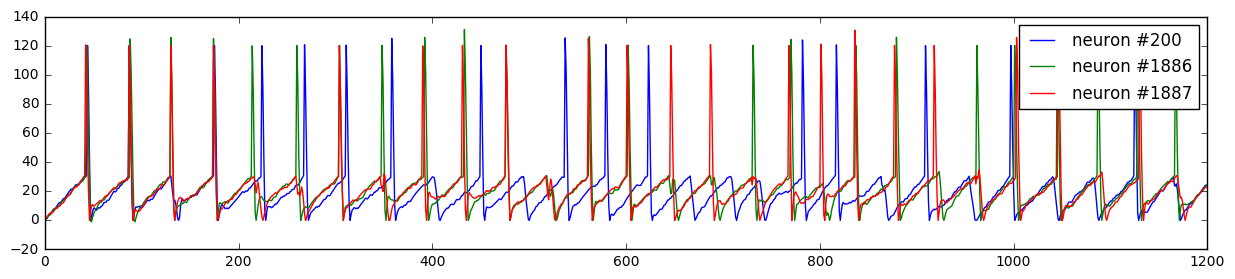

Cluster1 p_f=0.8
Cluster2 p_f=0.2


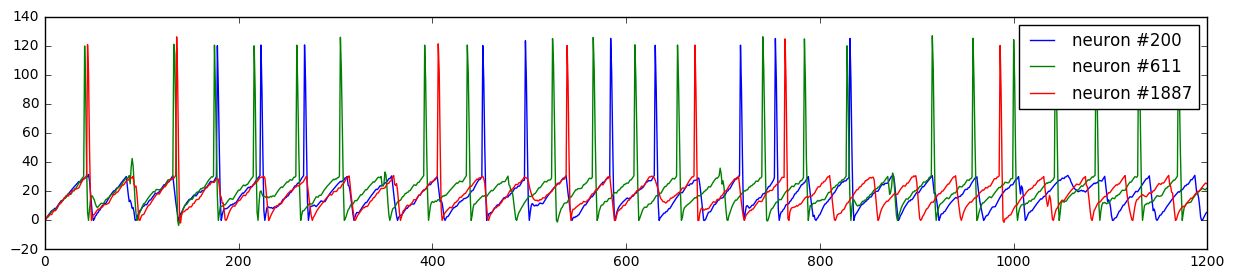

Cluster1 p_f=0.9
Cluster2 p_f=0.7


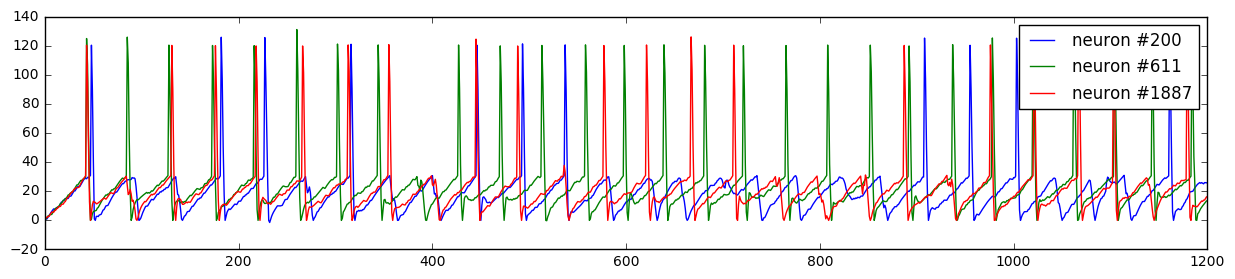

In [36]:
N=50
matrix1 = [[Neurona(0.4, 0.06) for j in range(N)] for i in range(N)]
matrix2 = [[Neurona(0.4, 0.06) for j in range(N)] for i in range(N)]
matrix3 = [[Neurona(0.4, 0.06) for j in range(N)] for i in range(N)]
for i in range(N):
    for j in range(N):
        if i>=10 and i<=15:
            if j>=9 and j<=14:
                matrix1[i][j].set_p_f(0.8)
                matrix2[i][j].set_p_f(0.8)
                matrix3[i][j].set_p_f(0.9)
        elif i>=34 and i<=39:
            if j>=33 and j<=38:
                matrix1[i][j].set_p_f(0.8)
                matrix2[i][j].set_p_f(0.2)
                matrix3[i][j].set_p_f(0.7)
                
for i in range (1200):
    disparo_red(matrix1)
    disparo_red(matrix2)
    disparo_red(matrix3)

print("Cluster1 p_f=0.8\nCluster2 p_f=0.8")
plt.figure(figsize=(15,3))    
plt.plot(matrix1[4][0].valores, label='neuron #200')
plt.plot(matrix1[36][35].valores, label='neuron #1886')
plt.plot(matrix1[36][36].valores, label='neuron #1887')
plt.legend(loc='upper right', shadow=False)
plt.show()

print("Cluster1 p_f=0.8\nCluster2 p_f=0.2")
plt.figure(figsize=(15,3))    
plt.plot(matrix2[4][0].valores, label='neuron #200')
plt.plot(matrix2[13][11].valores, label='neuron #611')
plt.plot(matrix2[36][36].valores, label='neuron #1887')
plt.legend(loc='upper right', shadow=False)
plt.show()

print("Cluster1 p_f=0.9\nCluster2 p_f=0.7")
plt.figure(figsize=(15,3))    
plt.plot(matrix3[4][0].valores, label='neuron #200')
plt.plot(matrix3[13][11].valores, label='neuron #611')
plt.plot(matrix3[36][36].valores, label='neuron #1887')
plt.legend(loc='upper right', shadow=False)
plt.show()


### Rejillas temporales

In [34]:
from matplotlib import animation
time=500
newarray = [[0.0 for j in range(N)] for i in range(N)]
lista=[]
fig=plt.figure(figsize=(8,8))
count=0
for time in range(500, 700, 1):
    for i in range(N):
        for j in range(N):
            newarray[i][j]=matrix1[i][j].valores[time]
    lista.append(plt.pcolor(newarray, vmin=0, vmax=120))
    #plt.colorbar()
    count=count+1
    plt.savefig('1/image'+str(count)+'.png')
plt.clf()

In [37]:
from matplotlib import animation
time=500
newarray = [[0.0 for j in range(N)] for i in range(N)]
lista=[]
fig=plt.figure(figsize=(8,8))
count=0
for time in range(500, 700, 1):
    for i in range(N):
        for j in range(N):
            newarray[i][j]=matrix2[i][j].valores[time]
    lista.append(plt.pcolor(newarray, vmin=0, vmax=120))
    #plt.colorbar()
    count=count+1
    plt.savefig('2/image'+str(count)+'.png')
plt.clf()

In [32]:
from matplotlib import animation
time=500
newarray = [[0.0 for j in range(N)] for i in range(N)]
lista=[]
fig=plt.figure(figsize=(8,8))
count=0
for time in range(500, 700, 1):
    for i in range(N):
        for j in range(N):
            newarray[i][j]=matrix3[i][j].valores[time]
    lista.append(plt.pcolor(newarray, vmin=0, vmax=120))
    #plt.colorbar()
    count=count+1
    plt.savefig('3/image'+str(count)+'.png')
plt.clf()